In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, bernoulli, binom
np.random.seed(28232)
import warnings

warnings.filterwarnings("ignore")

# wisdom of the crowd guessing number of gumballs

In [2]:
true_value = 100

crowd_bias = norm(loc=0, scale=3)
participants = np.arange(1,1000,30)
num_guesses = 50

In [3]:
crowd_q1   = np.empty(len(participants))
crowd_mean = np.empty(len(participants))
crowd_q3   = np.empty(len(participants))
crowd_std  = np.empty(len(participants))

for i in range(len(participants)):
    num_participants = participants[i]
    
    guesses = np.empty((num_guesses,num_participants))

    for g in range(num_participants):
        sigma = 10
        mu = true_value + crowd_bias.rvs()
        guesses[:,g] = norm.rvs(loc=mu,scale=sigma, size=num_guesses)

    round_stats = np.mean(guesses,axis=1)

    crowd_q1[i]   = np.quantile(round_stats,0.25)
    crowd_mean[i] = np.mean(round_stats)
    crowd_q3[i]   = np.quantile(round_stats,0.75)
    crowd_std[i]  = np.std(round_stats)

Text(0, 0.5, 'Ensemble variance')

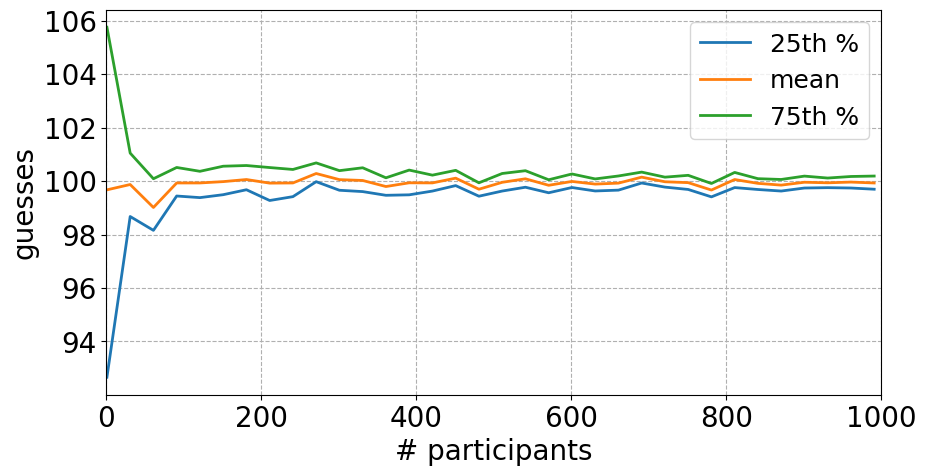

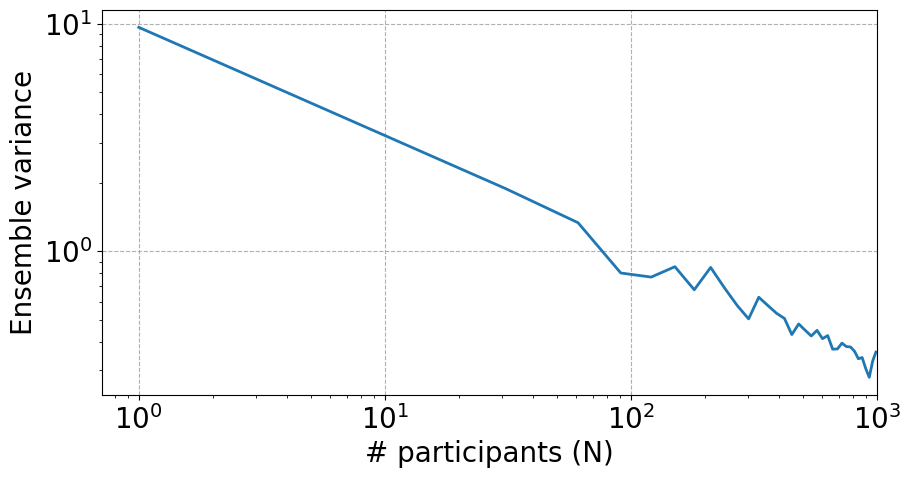

In [4]:
plt.figure(figsize=(10,5))
plt.plot(participants,crowd_q1,linewidth=2, label='25th %')
plt.plot(participants,crowd_mean,linewidth=2, label='mean')
plt.plot(participants,crowd_q3,linewidth=2, label='75th %')
plt.xlim(0,1000)
plt.grid(linestyle='--')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('# participants',fontsize=20)
plt.ylabel('guesses',fontsize=20)
plt.legend(fontsize=18)

plt.figure(figsize=(10,5))
plt.loglog(participants,crowd_std,linewidth=2)
plt.xlim(0,1000)
plt.grid(linestyle='--')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('# participants (N)',fontsize=20)
plt.ylabel('Ensemble variance',fontsize=20)

# wisdom of the crowd guessing bernoulli

In [5]:
maxparticipants = 3000
participants = np.arange(1,maxparticipants,50)
num_rounds = 500
p = 0.52

In [6]:
round_stats = np.empty((num_rounds,len(participants)))

for i in range(len(participants)):
    num_participants = participants[i]
    
    guesses = np.empty((num_rounds,num_participants))

    for g in range(num_participants):
        guesses[:,g] = bernoulli.rvs(p, size=num_rounds)
        
    round_stats[:,i] = np.sum(guesses,axis=1)>num_participants/2


Text(0, 0.5, 'accuracy')

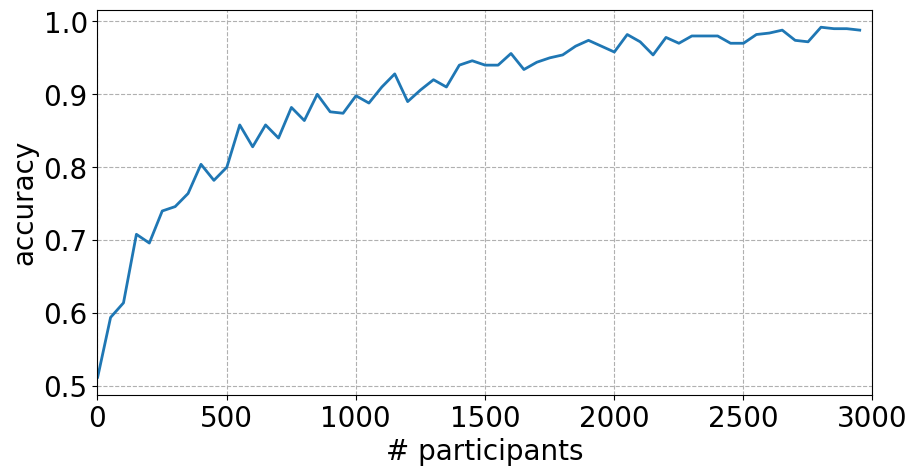

In [7]:
plt.figure(figsize=(10,5))
plt.plot(participants,np.mean(round_stats,axis=0),linewidth=2)
plt.xlim((0,maxparticipants))
plt.grid(linestyle='--')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('# participants',fontsize=20)
plt.ylabel('accuracy',fontsize=20)